In [34]:
from mlwpy import *
%matplotlib inline

In [35]:
diabetes = datasets.load_diabetes()

tts = skms.train_test_split(diabetes.data,diabetes.target,test_size=.25)

(diabetes_train_ftrs,diabetes_test_ftrs, diabetes_train_tgt,diabetes_test_tgt) = tts

In [36]:
diabetes_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


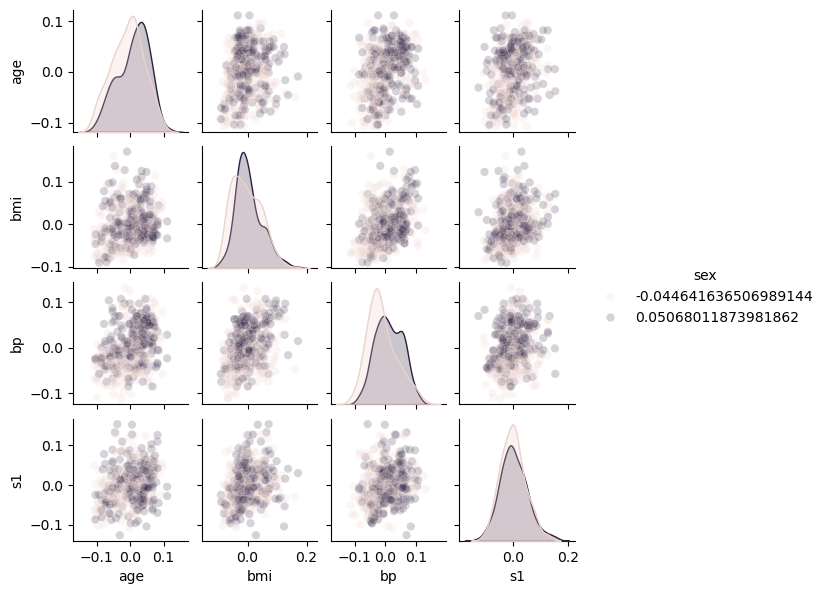

In [37]:
sns.pairplot(diabetes_df[['age', 'sex', 'bmi', 'bp', 's1']], 
             height=1.5, hue='sex', plot_kws={'alpha':.2});

In [38]:
values = np.array([1,3,5,8,11,13,15])
print('no outliers:',
     np.mean(values),
     np.median(values),sep='\n')

values_with_outliers = np.array([1,3,5,8,11,13,40])
print('outliers:',
     "%2.3f" % np.mean(values_with_outliers),
     np.median(values_with_outliers),sep='\n')

no outliers:
8.0
8.0
outliers:
11.571
8.0


In [39]:

distances = np.array([4.0, 2.0, 2.0])
closeness = 1.0 / distances              # element-by-element division
weights = closeness / np.sum(closeness)  # normalize sum to one
weights

array([0.2, 0.4, 0.4])

In [40]:
values = np.array([4,6,8])
result = np.dot(values,weights)
print('mean',np.mean(values))
print('weighted mean', result)


mean 6.0
weighted mean 6.4


In [41]:
#building a k-NN regression model
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
fit = knn.fit(diabetes_train_ftrs,diabetes_train_tgt)
pred = fit.predict(diabetes_test_ftrs)

#evaluate our predictions against heldback testing targets
metrics.mean_squared_error(diabetes_test_tgt, pred)


3108.805805805806

In [42]:
np.sqrt(3500)

59.16079783099616

In [43]:
diabetes_df['target'].max() - diabetes_df['target'].min()

321.0

In [44]:
def axis_helper(ax, lims):
    'clean up axes'
    ax.set_xlim(lims); ax.set_xticks([])
    ax.set_ylim(lims); ax.set_yticks([])
    ax.set_aspect('equal')
    

In [45]:
#our data is very simple two (x,y) points
D= np.array([[3,5],[4,2]])

#we'll take x as our "input" and y as our "output"
x,y = D[:,0],D[:,1]

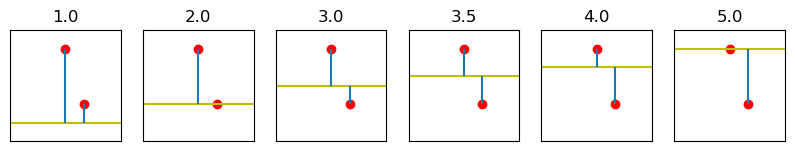

In [46]:
horizontal_lines = np.array([1,2,3,3.5,4,5,])
results = []
fig, axes = plt.subplots(1,6, figsize=(10,5))
for h_line,ax in zip(horizontal_lines,axes.flat):
     # styling
    axis_helper(ax, (0,6))
    ax.set_title(str(h_line))
    
    # plot the data
    ax.plot(x,y, 'ro')
    
    # plot the prediction line
    ax.axhline(h_line, color='y') # ax coords; defaults to 100%    

    # plot the errors
    # the horizontal line *is* our prediction; renaming for clarity
    predictions = h_line 
    ax.vlines(x, predictions, y)
    
    # calculate the error amounts and their sum-of-squares
    errors = y - predictions
    sse = np.dot(errors, errors)

    
    # put together some results in a tuple
    results.append((predictions, 
                    errors, errors.sum(), 
                    sse, np.sqrt(sse)))

In [47]:
col_labels = "Prediction","Errors","Sum","SSE","Distances"
display(pd.DataFrame.from_records(results,
                                 columns = col_labels,
                                  index = "Prediction"
                                       
                                   ))

,Errors,Sum,SSE,Distances
Prediction,,,,
1.0000,"[4.0, 1.0]",5.0000,17.0000,4.1231
2.0000,"[3.0, 0.0]",3.0000,9.0000,3.0000
3.0000,"[2.0, -1.0]",1.0000,5.0000,2.2361
3.5000,"[1.5, -1.5]",0.0000,4.5000,2.1213
4.0000,"[1.0, -2.0]",-1.0000,5.0000,2.2361
5.0000,"[0.0, -3.0]",-3.0000,9.0000,3.0000


In [67]:
def process(D, model, ax):
    x,y = D[:,0],D[:,1]
    m, b = model
    #styling
    axis_helper(ax,(0,8))

    #plot the data
    ax.plot(x,y,"ro")

    #plot the prediction line
    helper_xs = np.array([0,8])
    helper_line = helper_xs * m + b
    ax.plot(helper_xs,helper_line,color='y')

    #plot the errors
    predictions = m * x + b
    
    ax.vlines(x,predictions,y)

    #calculate the error amount
    errors = y - predictions

    #tuple up the results
    sse = np.dot(errors,errors)
    return (errors,errors.sum(),sse,np.sqrt(sse))
    
    

,Raw Errors,Sum,SSE,TotDist
0,"[2, -2]",0,8,2.8284
1,"[1, -3]",-2,10,3.1623
2,"[0, -4]",-4,16,4.0000
3,"[0, -2]",-2,4,2.0000
4,"[0, 0]",0,0,0.0000


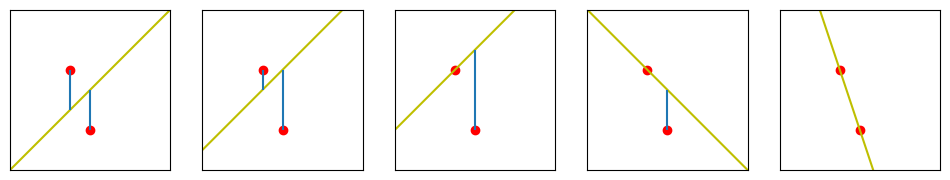

In [68]:
#we take two simple example datatypes
D = np.array([[3,5],
            [4,2]])

# here are the models
lines_mb = np.array([[1, 0],
                    [1, 1],
                    [1, 2],
                    [-1, 8],
                    [-3, 14]
                    ])

col_labels = ("Raw Errors","Sum","SSE","TotDist")
results = []
fig,axes = plt.subplots(1,5,figsize=(12,6))
records = [process(D ,mod , ax)  for mod ,ax in zip(lines_mb, axes.flat)]
df = pd.DataFrame.from_records(records, columns = col_labels)
display(df)